In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
(trainX, trainY), (testX, testY) = datasets.cifar10.load_data()

X = np.append(trainX, testX, axis=0)
Y = np.append(trainY, testY, axis=0)

X = X/255.

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.33)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.25)

In [4]:
(trainX.shape, trainY.shape), (valX.shape, valY.shape), (testX.shape, testY.shape)

(((30150, 32, 32, 3), (30150, 1)),
 ((10050, 32, 32, 3), (10050, 1)),
 ((19800, 32, 32, 3), (19800, 1)))

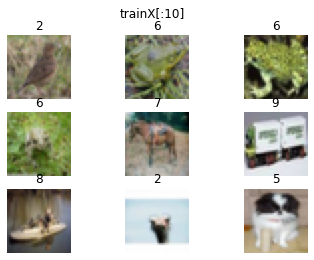

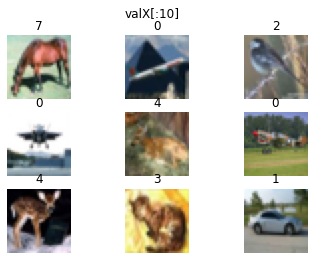

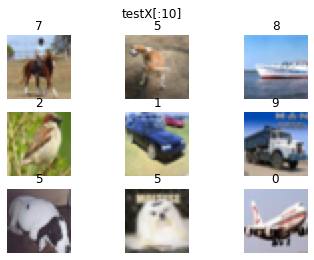

In [5]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(trainX[i])
    plt.title(trainY[i][0])
    plt.axis('off')

_ = plt.suptitle('trainX[:10]')

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(valX[i])
    plt.title(valY[i][0])
    plt.axis('off')

_ = plt.suptitle('valX[:10]')

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(testX[i])
    plt.title(testY[i][0])
    plt.axis('off')

_ = plt.suptitle('testX[:10]')


In [12]:
def loadModel( inputShape=(32, 32, 3) ):
    
    model = Sequential()
    model.add( Conv2D( 64, (3,3), input_shape=inputShape, padding='same', activation='relu' ) )
    model.add( MaxPooling2D( (2,2) ) )
    model.add( Conv2D( 64, (3,3), padding='same', activation='relu' ) )
    model.add( MaxPooling2D( (2,2) ) )
    model.add( Flatten() )
    model.add( Dense( 384, activation='relu') )
    model.add( Dense( 192, activation='relu') )
    model.add( Dense( 10, activation='softmax') )
    
    model.summary()
    
    return model

def plotHistory( history ):
    fig = plt.figure( figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='training')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('acc')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='training')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('loss')
    plt.legend()
    
    plt.suptitle('Learning Curve')

In [13]:
model = loadModel()
model.compile( optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
             )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               1573248   
_________________________________________________________________
dense_2 (Dense)              (None, 192)              

In [14]:
history = model.fit( trainX, trainY,
                     epochs=10,
                     batch_size=32,
                     validation_data=(valX, valY)
                   )

Epoch 1/10
943/943 [==============================] - 4s 4ms/step - loss: 1.4566 - accuracy: 0.4689 - val_loss: 1.2172 - val_accuracy: 0.5692
Epoch 2/10
943/943 [==============================] - 4s 4ms/step - loss: 1.0502 - accuracy: 0.6265 - val_loss: 1.0590 - val_accuracy: 0.6304
Epoch 3/10
943/943 [==============================] - 4s 4ms/step - loss: 0.8549 - accuracy: 0.6995 - val_loss: 0.9857 - val_accuracy: 0.6583
Epoch 4/10
943/943 [==============================] - 4s 4ms/step - loss: 0.7185 - accuracy: 0.7489 - val_loss: 0.9599 - val_accuracy: 0.6710
Epoch 5/10
943/943 [==============================] - 4s 4ms/step - loss: 0.5702 - accuracy: 0.7995 - val_loss: 1.0182 - val_accuracy: 0.6763
Epoch 6/10
943/943 [==============================] - 4s 4ms/step - loss: 0.4406 - accuracy: 0.8444 - val_loss: 1.0657 - val_accuracy: 0.6938
Epoch 7/10
943/943 [==============================] - 4s 4ms/step - loss: 0.3275 - accuracy: 0.8856 - val_loss: 1.1513 - val_accuracy: 0.6870
Epoch 

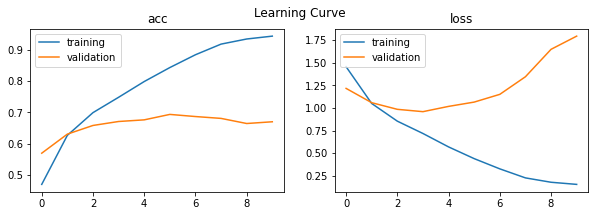

In [15]:
plotHistory(history)

In [16]:
loss, acc = model.evaluate( testX, testY )

619/619 [==============================] - 1s 2ms/step - loss: 1.7327 - accuracy: 0.6741


In [17]:
model.save(f'cifar10_{acc}.h5')